# Simple Benchmark

In [61]:
!pip3 install simple_benchmark

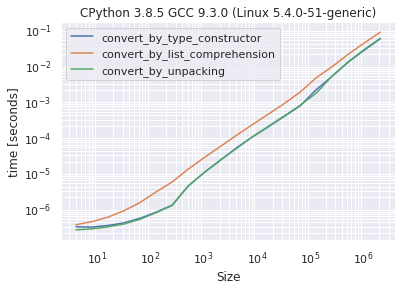

In [72]:
from simple_benchmark import BenchmarkBuilder
from heapq import nsmallest


b = BenchmarkBuilder()


@b.add_function()
def convert_by_type_constructor(size):
    list(iter(range(size)))

@b.add_function()
def convert_by_list_comprehension(size):
    [e for e in iter(range(size))]

@b.add_function()
def convert_by_unpacking(size):
    [*iter(range(size))]


@b.add_arguments('Size')
def argument_provider():
    for exp in range(2, 22):
        size = 2**exp
        yield size, size

r = b.run()
r.plot()

# Benchmark muliple pyhton version

In [40]:
from subprocess import PIPE, run

import seaborn as sns
import pandas

simple_data = {'constructor': [], 'unpacking': [], 'comprehension': [],
        'size': [], 'python version': []}

data = {'conversion type': [], 'timing in ms': [], 'size': [], 'python version': []}

size_test = 100, 1000, 10_000, 100_000, 1_000_000
for version in ['3.6', '3.7', '3.8', '3.9']:
    print('test for python', version)
    for size in size_test:
        command = [f'python{version}', 'perf_test_convert_iterator.py', f'--size={size}']
        result = run(command, stdout=PIPE, stderr=PIPE, universal_newlines=True)
        constructor, unpacking,  comprehension = result.stdout.split()
        
        data['conversion type'].extend(['constructor', 'unpacking', 'comprehension'])
        data['timing in ms'].extend([float(constructor), float(unpacking), float(comprehension)])
        data['python version'].extend([version] * 3) # same version for each conversion type
        data['size'].extend([size] * 3) # same size for each conversion type
        
        simple_data['constructor'].append(float(constructor))
        simple_data['unpacking'].append(float(unpacking))
        simple_data['comprehension'].append(float(comprehension))
        simple_data['python version'].append(version)
        simple_data['size'].append(size)


test for python 3.6
test for python 3.7
test for python 3.8
test for python 3.9


{'conversion type': ['constructor',
  'unpacking',
  'comprehension',
  'constructor',
  'unpacking',
  'comprehension',
  'constructor',
  'unpacking',
  'comprehension',
  'constructor',
  'unpacking',
  'comprehension',
  'constructor',
  'unpacking',
  'comprehension',
  'constructor',
  'unpacking',
  'comprehension',
  'constructor',
  'unpacking',
  'comprehension',
  'constructor',
  'unpacking',
  'comprehension',
  'constructor',
  'unpacking',
  'comprehension',
  'constructor',
  'unpacking',
  'comprehension',
  'constructor',
  'unpacking',
  'comprehension',
  'constructor',
  'unpacking',
  'comprehension',
  'constructor',
  'unpacking',
  'comprehension',
  'constructor',
  'unpacking',
  'comprehension',
  'constructor',
  'unpacking',
  'comprehension',
  'constructor',
  'unpacking',
  'comprehension',
  'constructor',
  'unpacking',
  'comprehension',
  'constructor',
  'unpacking',
  'comprehension',
  'constructor',
  'unpacking',
  'comprehension',
  'construct

In [ ]:
40.245270 - 25.355489

In [43]:
df_ = pandas.DataFrame(simple_data)
df_

,constructor,unpacking,comprehension,size,python version
0,0.001166,0.000970,0.002654,100,3.6
1,0.011248,0.010484,0.024443,1000,3.6
2,0.227935,0.223395,0.368549,10000,3.6
3,2.956320,2.903608,4.328522,100000,3.6
4,30.558531,32.697345,47.468047,1000000,3.6
5,0.001073,0.000973,0.002952,100,3.7
6,0.013333,0.012878,0.028878,1000,3.7
7,0.196517,0.180095,0.309312,10000,3.7
8,3.104935,3.192227,4.571884,100000,3.7
9,34.277222,33.617671,45.834312,1000000,3.7


up to ~40%  faster than comprehension if you are using the type constructor or unpacking

## python 3.6 

### size < 10000

<ipython-input-44-37f230551d64>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax = df_[df_['python version'] == '3.6'][df_['size'] < 10000].set_index('size').plot(kind='bar')


Text(0.5, 1.0, 'Python3.6: convert itertaror into  list')

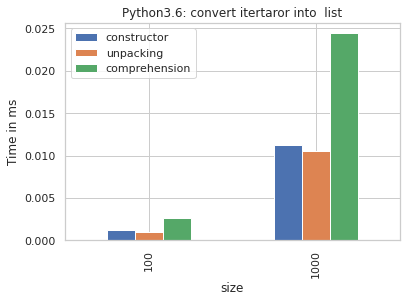

In [44]:
ax = df_[df_['python version'] == '3.6'][df_['size'] < 10000].set_index('size').plot(kind='bar')

ax.set_ylabel('Time in ms')
ax.set_title('Python3.6: convert itertaror into  list')

### size >= 10000 < 1mil

<ipython-input-49-3d92ce496f6d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax = df_[df_['python version'] == '3.6'][1000000 > df_['size']][df_['size'] >= 10000].set_index('size').plot(kind='bar')
<ipython-input-49-3d92ce496f6d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax = df_[df_['python version'] == '3.6'][1000000 > df_['size']][df_['size'] >= 10000].set_index('size').plot(kind='bar')


Text(0.5, 1.0, 'Python3.6: convert itertaror into  list')

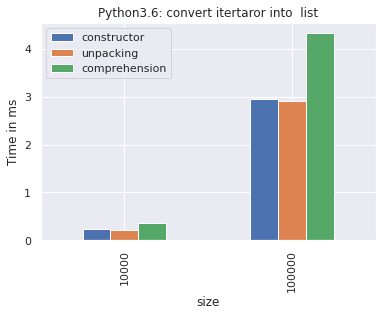

In [49]:
ax = df_[df_['python version'] == '3.6'][1000000 > df_['size']][df_['size'] >= 10000].set_index('size').plot(kind='bar')

ax.set_ylabel('Time in ms')
ax.set_title('Python3.6: convert itertaror into  list')

### size = 1mil

<ipython-input-47-e180722d0dc0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax = df_[df_['python version'] == '3.6'][1000000 == df_['size']].set_index('size').plot(kind='bar')


Text(0.5, 1.0, 'Python3.6: convert itertaror into  list')

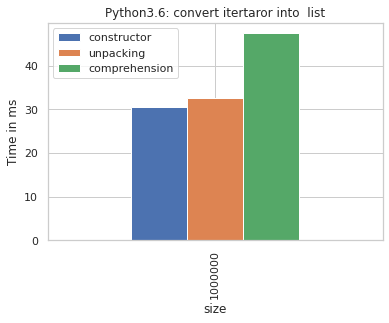

In [47]:
ax = df_[df_['python version'] == '3.6'][1000000 == df_['size']].set_index('size').plot(kind='bar')

ax.set_ylabel('Time in ms')
ax.set_title('Python3.6: convert itertaror into  list')

## Compare across different versions

In [50]:
import pandas 

df = pandas.DataFrame(data)
sns.set()

df

,conversion type,timing in ms,size,python version
0,constructor,0.001166,100,3.6
1,unpacking,0.000970,100,3.6
2,comprehension,0.002654,100,3.6
3,constructor,0.011248,1000,3.6
4,unpacking,0.010484,1000,3.6
5,comprehension,0.024443,1000,3.6
6,constructor,0.227935,10000,3.6
7,unpacking,0.223395,10000,3.6
8,comprehension,0.368549,10000,3.6
9,constructor,2.956320,100000,3.6


### Compare  conversion with type constructor 

### size <= 1000

<ipython-input-51-20d2d478f425>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df['size'] <= 1000][df['conversion type'] == 'constructor'], kind="bar",


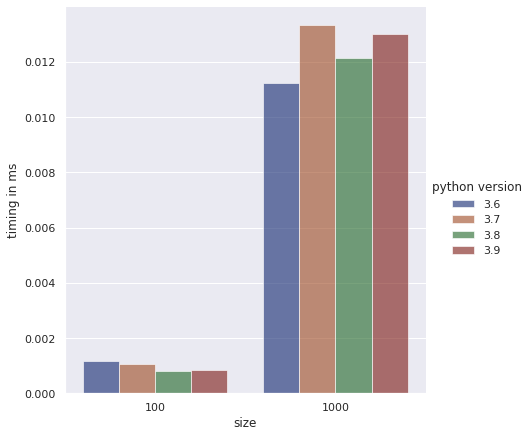

In [51]:
g = sns.catplot(
    data=df[df['size'] <= 1000][df['conversion type'] == 'constructor'], kind="bar",
    x="size", y="timing in ms", hue="python version",
    ci="sd", palette="dark", alpha=.6, height=6
)

### size >= 10000 < 1 mil

<ipython-input-56-50bf86d0959a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df['size'] >= 10000][df['size'] < 1000000][df['conversion type'] == 'constructor'], kind="bar",


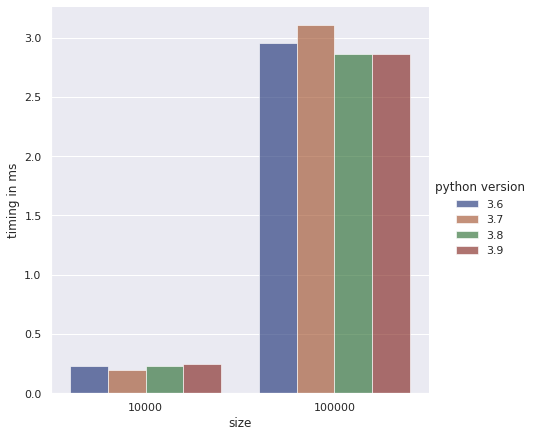

In [56]:
g = sns.catplot(
    data=df[df['size'] >= 10000][df['size'] < 1000000][df['conversion type'] == 'constructor'], kind="bar",
    x="size", y="timing in ms", hue="python version",
    ci="sd", palette="dark", alpha=.6, height=6
)

### size == 1 mil

<ipython-input-57-67cb006e4ac4>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df['size'] == 1000000][df['conversion type'] == 'constructor'], kind="bar",


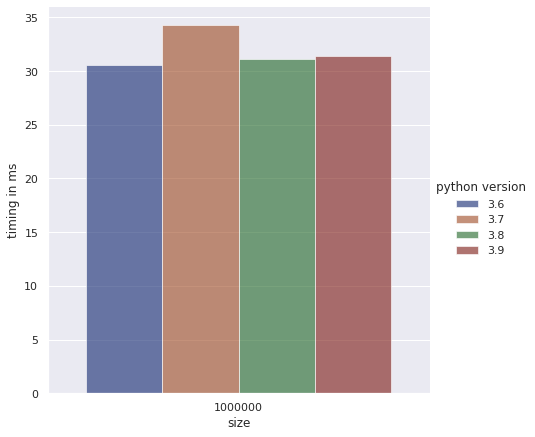

In [57]:
g = sns.catplot(
    data=df[df['size'] == 1000000][df['conversion type'] == 'constructor'], kind="bar",
    x="size", y="timing in ms", hue="python version",
    ci="sd", palette="dark", alpha=.6, height=6
)

In [70]:
class FirstTen:
    
    def __init__(self):
        self.current_value = 0
        
    def __iter__(self):
        return self

    def __next__(self):
        if self.current_value == 10:
            raise StopIteration
            
        result = self.current_value
        self.current_value += 1
        
        return result
        

In [71]:
[*FirstTen()]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]